<h1>Exploratory Data Analysis (EDA)</h1>

<p>This is the next component of the NLP pipeline (follows data cleaning). EDA is carried out to verify that the data we have makes sense. If it doesn't, then we'll have to go back to our data cleaning notebook and implement a few more techniques to transform the data into a more usable format.</p>

In [1]:
import pandas as pd
import seaborn as sns
from textblob import TextBlob

# Read in corpus and DTMs
headlines = pd.read_pickle("./pickles/headline_dtm.pkl")
text = pd.read_pickle("./pickles/text_dtm.pkl")
df = pd.read_pickle("./pickles/corpus.pkl")

# Transposing the datasets for easier comprehension
headlines = headlines.transpose()
text = text.transpose()

<p>EDA is done by visualizing aspects of the cleaned dataset.</p>

<p><i>(For each visualization that's presented, there will be two variants - headlines and display text.)</i></p>

<li>Comparing sentiment polarity using TextBlob</li>

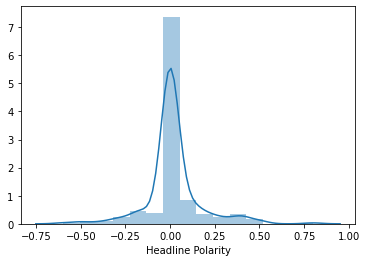

In [2]:
# Headline sentiment
df["Headline Polarity"] = df["Headline"].map(lambda text: TextBlob(text).sentiment.polarity)

sns.distplot(df["Headline Polarity"])

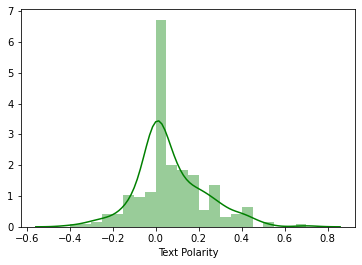

In [3]:
# Display text sentiment (headline + first sentence)
df["Text Polarity"] = df["Text"].map(lambda text: TextBlob(text).sentiment.polarity)

sns.distplot(df["Text Polarity"], color="g")

<p>This tells us that most of the news has been pretty neutral (positive) in sentiment. Let's compare this to the stock price inlection to verify this.</p>

<li>Stock price inflection</li>

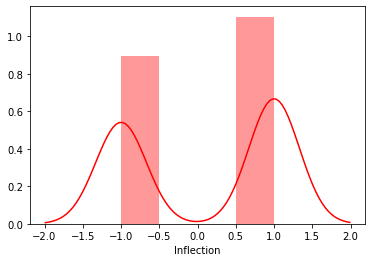

In [4]:
sns.distplot(df["Inflection"], color="r")

<p>So it's true that there are more upward inflections in the price.</p>

<p>Let's take a look at the length of the text.</p>

<li>News length</li>

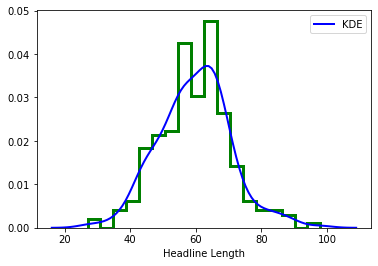

In [5]:
# Headline length
df["Headline Length"] = df["Headline"].map(lambda text: len(text))

sns.distplot(df["Headline Length"],
             kde_kws={"color": "b", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "g"})

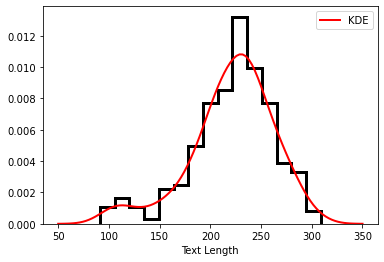

In [6]:
# Display text length (headline + first sentence)
df["Text Length"] = df["Text"].map(lambda text: len(text))

sns.distplot(df["Text Length"],
             kde_kws={"color": "r", "lw": 2, "label": "KDE"},
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "k"})

<p>The mode headline length is around 70 characters while the mode display text length is around 280 characters. Let's see if these numbers mean anything by charting correlation plots (with Inflection).</p>

<li>Correlation between news length and price inflection</li>

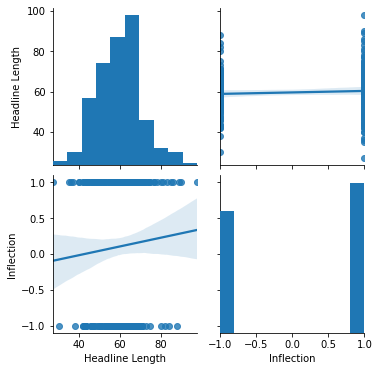

In [7]:
# Relationship between headline length and price inflection
sns.pairplot(df, vars=["Headline Length", "Inflection"], kind="reg")

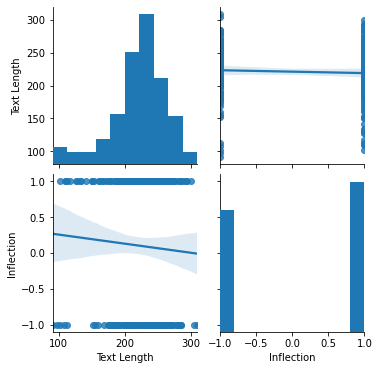

In [8]:
# Relationship between display text length and price inflection
sns.pairplot(df, vars=["Text Length", "Inflection"], kind="reg")

<p>From the above pair plots, we can see that there isn't really a correlation between the text length and the behaviour of the stock price. This makes sense as the sentiment of a piece of text doesn't have to depend on how long it is.</p>

<p>Let's now take a look at the most frequent words in the news.<p>

In [9]:
from nltk import FreqDist
import matplotlib.pyplot as plt

In [10]:
# Filter entries by sentiment
df_positive = df[df["Inflection"] == 1]
df_negative = df[df["Inflection"] == -1]

In [11]:
# Function to plot the 5 most frequent entries
def plot_most_frequent(data, color="g"):
    # Extracts words into list and count frequency
    all_words = " ".join([text for text in data])
    all_words = all_words.split()
    words_df = FreqDist(all_words)

    # Extracting words and frequency from words_df object
    words_df = pd.DataFrame({"word":list(words_df.keys()), "count":list(words_df.values())})

    # Top 10 words
    words_df = words_df.nlargest(columns="count", n=5) 

    words_df.sort_values("count", inplace=True)

    # Plotting the 10 most frequent words
    plt.figure(figsize=(10,3))
    
    ax = plt.barh(words_df["word"], width=words_df["count"], color=color)
    
    plt.show()

<p>Upon running the function on all 4 variations, I realised that I had to remove stop words from the corpus because the most common words were "to", "in", "on", "of", and "a". This is where I went back and added a function to remove stop words from the corpus in the data cleaning notebook.</p>

<li>Most frequent words (positive sentiment)</li>

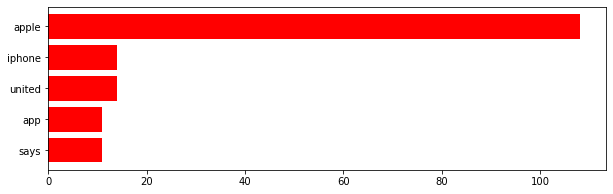

In [12]:
# Headline
plot_most_frequent(df_positive["Headline"], "r")

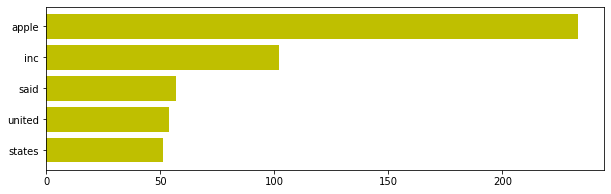

In [13]:
# Display text (headline + first sentence)
plot_most_frequent(df_positive["Text"], "y")

<li>Most frequent words (negative sentiment)</li>

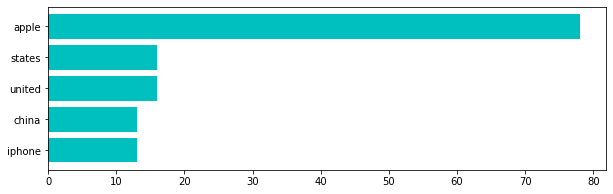

In [14]:
# Headline
plot_most_frequent(df_negative["Headline"], "c")

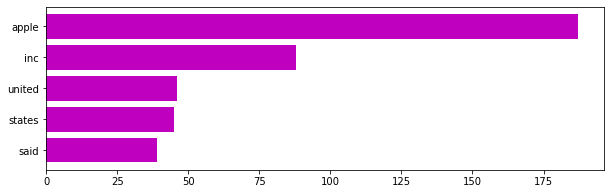

In [15]:
# Display text (headline + first sentence)
plot_most_frequent(df_negative["Text"], "m")